# Bias-Variance Tradeoff - Lab

## Introduction

In this lab, you'll practice the concepts you learned in the last lesson, bias-variance tradeoff. 

## Objectives

In this lab you will: 

- Demonstrate the tradeoff between bias and variance by way of fitting a machine learning model 

## Let's get started!

In this lab, you'll try to predict some movie revenues based on certain factors, such as ratings and movie year. Start by running the following cell which imports all the necessary functions and the dataset: 

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_excel('movie_data_detailed_with_ols.xlsx')
df.head()

,Unnamed: 0,budget,domgross,title,Response_Json,Year,imdbRating,Metascore,imdbVotes,Model
0,0,13000000,25682380,21 &amp; Over,0,2008,6.8,48,206513,4.912759e+07
1,1,45658735,13414714,Dredd 3D,0,2012,0.0,0,0,2.267265e+05
2,2,20000000,53107035,12 Years a Slave,0,2013,8.1,96,537525,1.626624e+08
3,3,61000000,75612460,2 Guns,0,2013,6.7,55,173726,7.723381e+07
4,4,40000000,95020213,42,0,2013,7.5,62,74170,4.151958e+07


Subset the `df` DataFrame to only keep the `'domgross'`, `'budget'`, `'imdbRating'`, `'Metascore'`, and `'imdbVotes'` columns. 

In [2]:
# Subset the DataFrame
df = df[['domgross', 'budget', 'imdbRating', 'Metascore', 'imdbVotes']]

## Split the data


- First, assign the predictors to `X` and the outcome variable, `'domgross'` to `y` 
- Split the data into training and test sets. Set the seed to 42 and the `test_size` to 0.25 

In [3]:
# domgross is the outcome variable
X = df[['budget', 'imdbRating', 'Metascore', 'imdbVotes']]
y = df['domgross']

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [4]:
# create a scaler
scaler = MinMaxScaler()

Use the `MinMaxScaler` to scale the training set. Remember you can fit and transform in a single method using `.fit_transform()`.  

Then, use `.transform()` to apply the scaler to the test set.

In [5]:
# fit and transform X_train
# X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = scaler.fit_transform(X_train)

# transform X_test
X_test_scaled = scaler.transform(X_test)

## Fit a regression model to the training data

In [6]:
# Your code 
from sklearn.linear_model import LinearRegression
# create an instance of linear regression
linreg = LinearRegression()

# fit the model to X_train and y_train
linreg.fit(X_train_scaled, y_train)


LinearRegression()

Use the model to make predictions on both the training and test sets: 

In [7]:
# Training set predictions
lm_train_predictions = linreg.predict(X_train_scaled)

# Test set predictions 
lm_test_predictions = linreg.predict(X_test_scaled)

Plot predictions for the training set against the actual data: 

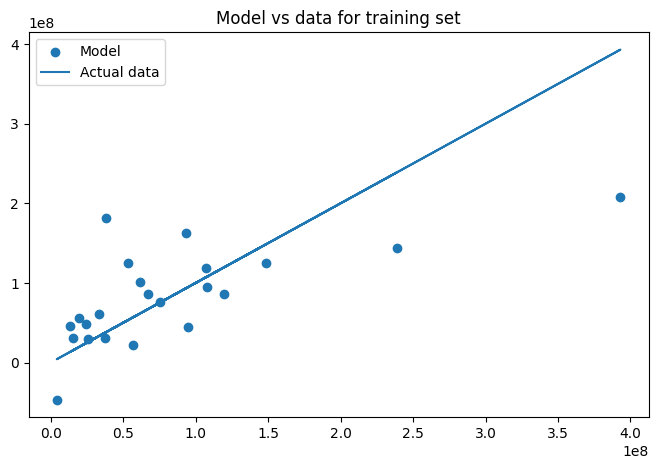

In [8]:
# Run this cell - vertical distance between the points and the line denote the errors
plt.figure(figsize=(8, 5))
plt.scatter(y_train, lm_train_predictions, label='Model')
plt.plot(y_train, y_train, label='Actual data')
plt.title('Model vs data for training set')
plt.legend();

Plot predictions for the test set against the actual data: 

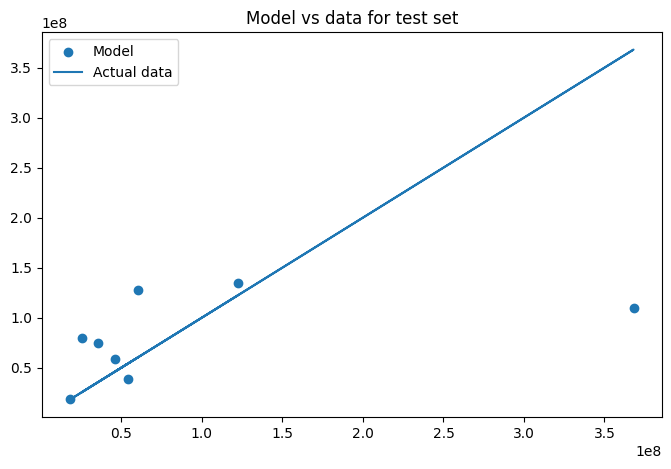

In [9]:
# Run this cell - vertical distance between the points and the line denote the errors
plt.figure(figsize=(8, 5))
plt.scatter(y_test, lm_test_predictions, label='Model')
plt.plot(y_test, y_test, label='Actual data')
plt.title('Model vs data for test set')
plt.legend();

## Bias

Create a function `bias()` to calculate the bias of a model's predictions given the actual data: $Bias(\hat{f}(x)) = E[\hat{f}(x)-f(x)]$   
(The expected value can simply be taken as the mean or average value.)  

In [10]:
import numpy as np
def bias(y, y_hat):
    return np.mean(y_hat - y)

## Variance
Create a function `variance()` to calculate the variance of a model's predictions: $Var(\hat{f}(x)) = E[\hat{f}(x)^2] - \big(E[\hat{f}(x)]\big)^2$

In [11]:
def variance(y_hat):
    return np.mean(y_hat**2) - (np.mean(y_hat))**2

## Calculate bias and variance

In [12]:
# Bias and variance for training set 
b = bias(y_train, lm_train_predictions)
v = variance(lm_train_predictions)
print(f'Train bias: {b} \nTrain variance: {v}')

# Train bias (approximate): -4.063953052867542e-09 
# Train variance (approximate): 3406811040986517.0

Train bias: -9.4825571233576e-09 
Train variance: 3406811040986513.0


In [13]:
# Bias and variance for test set 
b = (y_test, lm_test_predictions)
v = variance(lm_test_predictions)
print(f'Test bias: {b} \nTest variance: {v}')

# Test bias: -10982393.918069275 
# Test variance: 1518678846127932.0

Test bias: (27    122523060
15     35266619
23     25213103
17    368065385
8      18007317
9      60522097
28     46000903
24     54239856
Name: domgross, dtype: int64, array([1.34337640e+08, 7.48938976e+07, 7.95992631e+07, 1.09813318e+08,
       1.83414639e+07, 1.27954988e+08, 5.84880277e+07, 3.85505902e+07])) 
Test variance: 1518678846127930.0


## Overfit a new model 

Use `PolynomialFeatures` with degree 3 and transform `X_train_scaled` and `X_test_scaled`. 

**Important note:** By including this, you don't only take polynomials of single variables, but you also combine variables, eg:

*Budget* times *MetaScore* squared

What you're essentially doing is taking interactions and creating polynomials at the same time! Have a look at how many columns we get using `np.shape()`! 


In [14]:
# Your code here
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Create polynomial features with degree 3
poly = PolynomialFeatures(degree=3)

# Transform X_train_scaled and X_test_scaled
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [15]:
# Check the shape
print(X_train_poly.shape, X_test_poly.shape)

(22, 35) (8, 35)


Fit a regression model to the training data: 

In [16]:
# Your code here

polyreg = LinearRegression()
polyreg.fit(X_train_poly, y_train)



LinearRegression()

Use the model to make predictions on both the training and test sets: 

In [17]:
# Training set predictions
poly_train_predictions = polyreg.predict(X_train_poly)

# Test set predictions 
poly_test_predictions = polyreg.predict(X_test_poly)

Plot predictions for the training set against the actual data: 

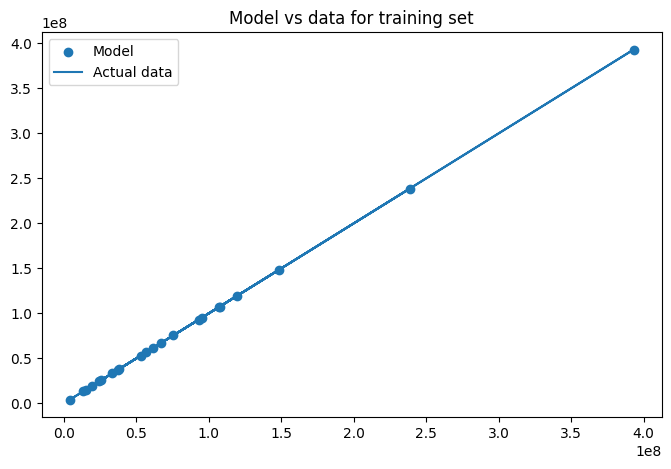

In [18]:
# Run this cell - vertical distance between the points and the line denote the errors
plt.figure(figsize=(8, 5))
plt.scatter(y_train, poly_train_predictions, label='Model')
plt.plot(y_train, y_train, label='Actual data')
plt.title('Model vs data for training set')
plt.legend();

Plot predictions for the test set against the actual data: 

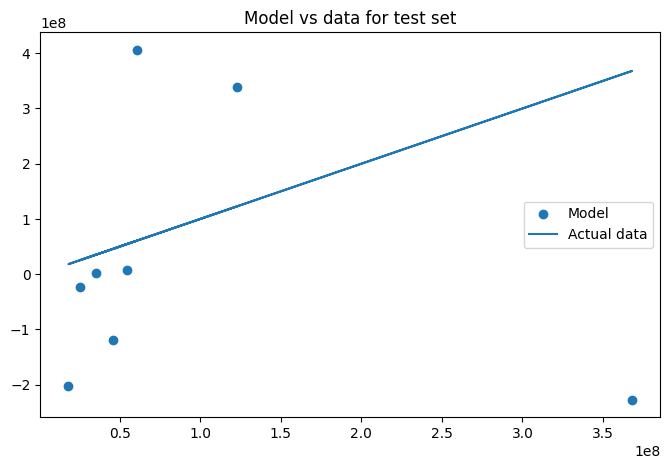

In [19]:
# Run this cell - vertical distance between the points and the line denote the errors
plt.figure(figsize=(8, 5))
plt.scatter(y_test, poly_test_predictions, label='Model')
plt.plot(y_test, y_test, label='Actual data')
plt.title('Model vs data for test set')
plt.legend();

Calculate the bias and variance for the training set: 

In [20]:
# Bias and variance for training set 
b = bias(y_train, poly_train_predictions)
v = variance(poly_train_predictions)
print('Train bias: {} \nTrain variance: {}'.format(b, v))

# Train bias (approximate): -2.0997090773148971e-07
# Train variance (approximate): 7394168636697528.0

Train bias: -6.288967349312522e-07 
Train variance: 7394168636697383.0


Calculate the bias and variance for the test set: 

In [21]:
# Bias and variance for test set 
b = bias(y_test, poly_test_predictions)
v = variance(poly_test_predictions)
print('Test bias: {} \nTest variance: {}'.format(b, v))

# Test bias: -68166032.47666144 
# Test variance: 4.798244829435879e+16

Test bias: -68166032.47666319 
Test variance: 4.798244829436079e+16


## Interpret the overfit model

# Your description here
# Interpretation of the Overfit Model
The polynomial regression model has significantly increased the complexity of the model, 
resulting in an extremely low bias but a very high variance. 
This is a classic example of overfitting, where the model learns the training data too well 
but fails to generalize to new data.

Key Observations:
- The training bias is nearly zero, indicating that the model fits the training data perfectly.
- However, the training variance is high, meaning the predictions fluctuate a lot within the training set.
- The test bias is large and negative, suggesting that the model's predictions deviate significantly 
  from actual values in the test set.
- The test variance is extremely high, confirming that the model is highly sensitive to small changes in input values.

Conclusion:
This overfit model captures noise in the training data rather than the true underlying pattern. 
A high variance model like this will perform poorly on unseen data. 

To reduce overfitting, we could:
- Reduce the polynomial degree.
- Use regularization techniques like Ridge or Lasso regression.
- Increase the amount of training data.


## Level Up (Optional)

In this lab we went from 4 predictors to 35 by adding polynomials and interactions, using `PolynomialFeatures`. That being said, where 35 leads to overfitting, there are probably ways to improve by adding just a few polynomials. Feel free to experiment and see how bias and variance improve!

# Level Up (Optional)

In this lab, we increased the number of predictors from 4 to 35 by adding polynomial features 
and interaction terms using PolynomialFeatures. 

While this approach can enhance the model’s ability to capture complex relationships, 
it also introduces a high risk of overfitting. 

Observations:
- With 35 features, the model becomes too complex, leading to high variance and poor generalization.
- There is an opportunity to experiment with different polynomial degrees and fewer interaction terms 
  to strike a better balance between bias and variance.

Possible Improvements:
- Reduce the polynomial degree (e.g., from 3 to 2) to maintain complexity without excessive overfitting.
- Use feature selection techniques to retain only the most important polynomial terms.
- Apply Ridge or Lasso regression to regularize the model and control variance.
- Increase the size of the training set to improve generalization.

Next Steps:
Try modifying the polynomial degree or introducing regularization techniques to observe their effects 
on bias and variance. Compare the results and determine the best approach for a well-generalized model.




## Summary

This lab gave you insight into how bias and variance change for a training and a test set by using both simple and complex models. 